Propose:1. prove interest rate affect stock price
2.with and without regressor(furture data) check "SPY" to price(use R^2 bigger more reliable)

In [ ]:
# Install package(s)
!pip install yfinance

In [ ]:
import yfinance as yf
from prophet import Prophet
import pandas as pd

# Specify the stock symbol and the period for which you want the historical data
stock_symbol = 'SPY'
period = '10y'  # 10 years of historical data

# Fetch historical stock prices
stock_data_SPY = yf.download(stock_symbol, period=period)

# Reset the index to make Date a column
stock_data_SPY.reset_index(inplace=True) # Same as stock_data = stock_data.reset_index() index into column

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_symbol = '^TNX'  # Choose one stock
period = '10y'  # 10 years of historical data

# Fetch historical stock prices
stock_data_TNX = yf.download(stock_symbol, period=period)

# Reset the index to make Date a column
stock_data_TNX.reset_index(inplace=True) # Same as stock_data = stock_data.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Choose two columns of the whole table we want
stock_data_SPY = stock_data_SPY[['Date','Close']]
stock_data_TNX = stock_data_TNX[['Date','Close']]

In [ ]:
# Change column name before Inner Join
stock_data_SPY.rename(columns={'Close': 'Close_SPY'}, inplace=True)# Change the index into column
stock_data_TNX.rename(columns={'Close': 'Close_TNX'}, inplace=True)

In [ ]:
# Performing an inner join on 'Date'
df = pd.merge(stock_data_SPY, stock_data_TNX, on='Date', how='inner')

In [ ]:
df

,Date,Close_SPY,Close_TNX
0,2013-12-06,180.940002,2.883
1,2013-12-09,181.399994,2.857
2,2013-12-10,180.750000,2.797
3,2013-12-11,178.720001,2.844
4,2013-12-12,178.130005,2.877
...,...,...,...
2509,2023-11-29,454.609985,4.271
2510,2023-11-30,456.399994,4.352
2511,2023-12-01,459.100006,4.226
2512,2023-12-04,456.690002,4.288


In [ ]:
# Get Correlation coefficient of Close_SPY and Close_TNX
correlation = df['Close_SPY'].corr(df['Close_TNX'])

In [ ]:
correlation

0.15682004529932378

In [ ]:
prophet_data = df.rename(columns={'Date': 'ds', 'Close_SPY': 'y'})

In [ ]:
prophet_data

,ds,y,Close_TNX
0,2013-12-06,180.940002,2.883
1,2013-12-09,181.399994,2.857
2,2013-12-10,180.750000,2.797
3,2013-12-11,178.720001,2.844
4,2013-12-12,178.130005,2.877
...,...,...,...
2509,2023-11-29,454.609985,4.271
2510,2023-11-30,456.399994,4.352
2511,2023-12-01,459.100006,4.226
2512,2023-12-04,456.690002,4.288


With regressor (TNX)

In [ ]:
# Initialize Prophet model and add the additional regressor
model = Prophet(weekly_seasonality=False,yearly_seasonality=False,daily_seasonality=False)
model.add_regressor('Close_TNX')

# Fit the model with the data
model.fit(prophet_data)

# Make a future dataframe for forecasting
future = model.make_future_dataframe(periods=0)
future = future.merge(prophet_data[['ds', 'Close_TNX']], on='ds', how='left')
future['Close_TNX'] = future['Close_TNX'].ffill()

# Forecast
forecast = model.predict(future)

# Displaying the forecasted stock price
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

DEBUG:cmdstanpy:input tempfile: /tmp/tmp40afp82k/7qisg0uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40afp82k/fsemiwht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86511', 'data', 'file=/tmp/tmp40afp82k/7qisg0uy.json', 'init=/tmp/tmp40afp82k/fsemiwht.json', 'output', 'file=/tmp/tmp40afp82k/prophet_modeloy0kabr0/prophet_model-20231206132901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:29:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:29:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
2509 2023-11-29  422.420357  403.781141  441.550658
2510 2023-11-30  420.782180  402.309795  439.779197
2511 2023-12-01  423.476298  404.747446  441.453590
2512 2023-12-04  422.349910  403.380359  441.494695
2513 2023-12-05  424.855661  405.500373  442.718963


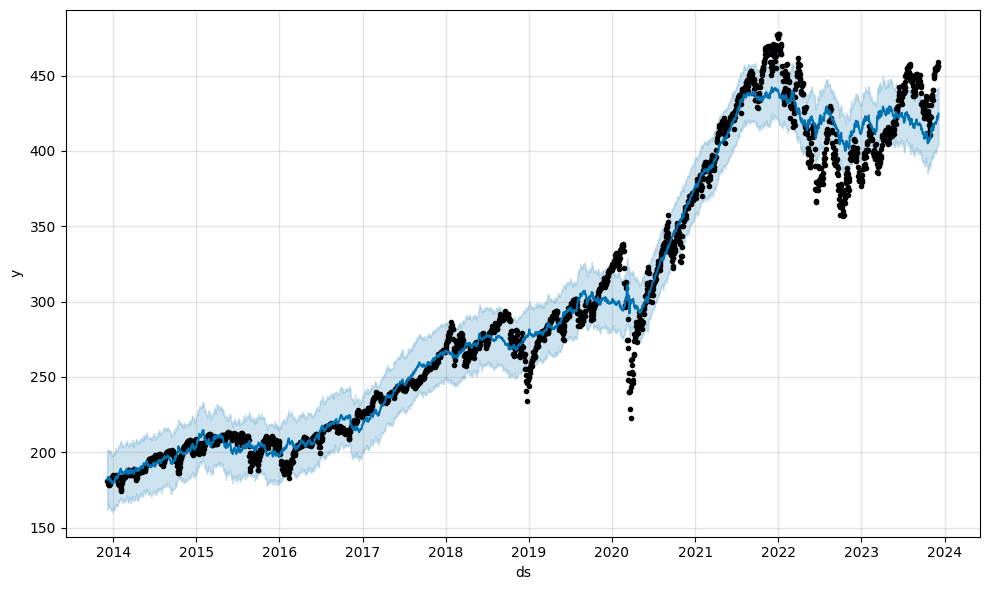

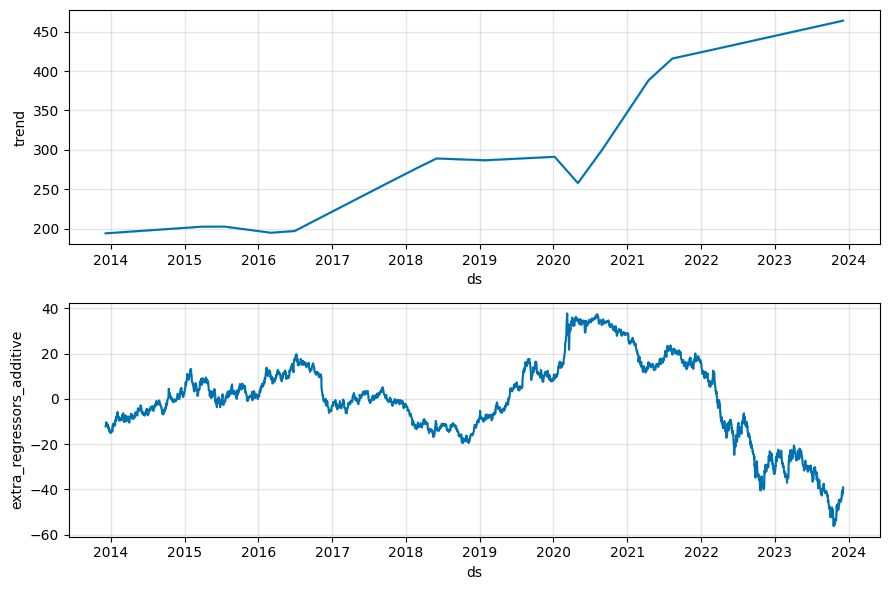

In [ ]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
fig2.show()

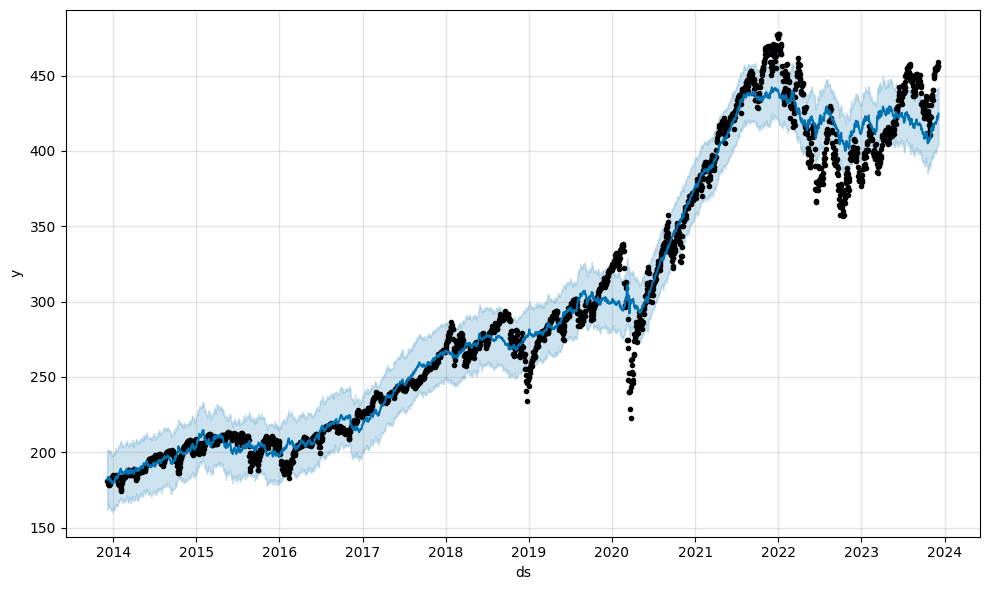

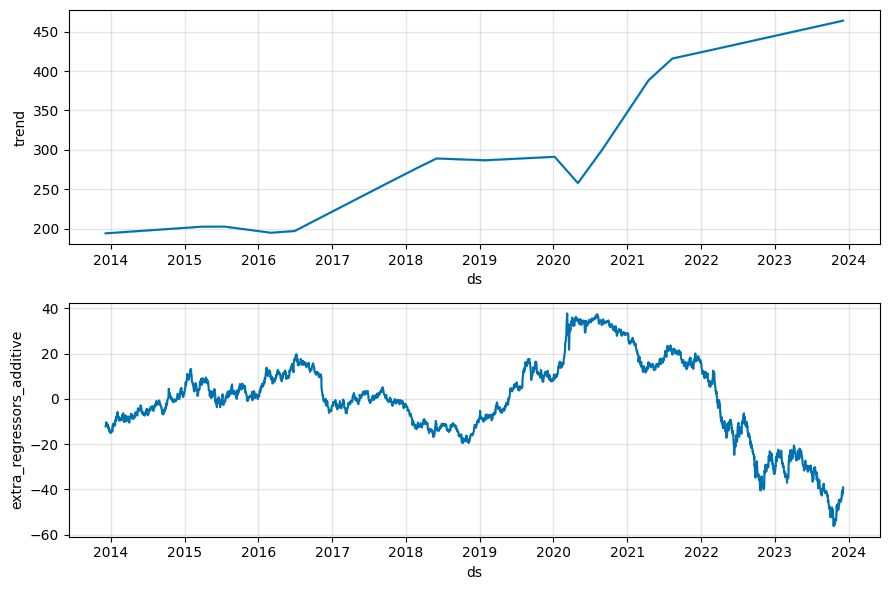

In [ ]:

# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
fig2.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_TNX,Close_TNX_lower,Close_TNX_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-12-06,193.909651,161.990060,200.207870,193.909651,193.909651,-12.147582,-12.147582,-12.147582,-12.147582,-12.147582,-12.147582,-12.147582,-12.147582,-12.147582,0.0,0.0,0.0,181.762069
1,2013-12-09,193.963764,163.321961,202.122014,193.963764,193.963764,-11.603435,-11.603435,-11.603435,-11.603435,-11.603435,-11.603435,-11.603435,-11.603435,-11.603435,0.0,0.0,0.0,182.360329
2,2013-12-10,193.981802,166.190316,201.334926,193.981802,193.981802,-10.347699,-10.347699,-10.347699,-10.347699,-10.347699,-10.347699,-10.347699,-10.347699,-10.347699,0.0,0.0,0.0,183.634103
3,2013-12-11,193.999840,164.599186,201.304568,193.999840,193.999840,-11.331360,-11.331360,-11.331360,-11.331360,-11.331360,-11.331360,-11.331360,-11.331360,-11.331360,0.0,0.0,0.0,182.668480
4,2013-12-12,194.017877,163.437406,201.071229,194.017877,194.017877,-12.022013,-12.022013,-12.022013,-12.022013,-12.022013,-12.022013,-12.022013,-12.022013,-12.022013,0.0,0.0,0.0,181.995865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2023-11-29,463.617226,402.998912,440.564927,463.617226,463.617226,-41.196869,-41.196869,-41.196869,-41.196869,-41.196869,-41.196869,-41.196869,-41.196869,-41.196869,0.0,0.0,0.0,422.420357
2510,2023-11-30,463.674296,403.788473,440.454351,463.674296,463.674296,-42.892115,-42.892115,-42.892115,-42.892115,-42.892115,-42.892115,-42.892115,-42.892115,-42.892115,0.0,0.0,0.0,420.782180
2511,2023-12-01,463.731366,403.846217,441.947059,463.731366,463.731366,-40.255068,-40.255068,-40.255068,-40.255068,-40.255068,-40.255068,-40.255068,-40.255068,-40.255068,0.0,0.0,0.0,423.476298
2512,2023-12-04,463.902575,403.758235,439.889548,463.902575,463.902575,-41.552664,-41.552664,-41.552664,-41.552664,-41.552664,-41.552664,-41.552664,-41.552664,-41.552664,0.0,0.0,0.0,422.349910


In [ ]:
stock_data_current = prophet_data[prophet_data['ds'] == max(prophet_data['ds'])]
actual_current_price = float(stock_data_current['y'].iloc[0])
forecast_current = forecast[forecast['ds'] == max(prophet_data['ds'])]
estimated_current_price = float(forecast_current['yhat'].iloc[0])
difference = estimated_current_price / actual_current_price -1


In [ ]:
estimated_current_price

424.8556611365443

In [ ]:
actual_current_price

456.6000061035156

In [ ]:
# r-squared value with regressor
(prophet_data['y'].corr(forecast['yhat']))**2

0.9735613351728539

Without regressor

In [ ]:
# Initialize Prophet model and add the additional regressor
model = Prophet(weekly_seasonality=False,yearly_seasonality=False,daily_seasonality=False)

# Fit the model with the data
model.fit(prophet_data)

# Make a future dataframe for forecasting
future = model.make_future_dataframe(periods=0)

# Forecast
forecast = model.predict(future)

# Displaying the forecasted stock price
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

DEBUG:cmdstanpy:input tempfile: /tmp/tmp40afp82k/izr7zf17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40afp82k/b7pxfxbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38186', 'data', 'file=/tmp/tmp40afp82k/izr7zf17.json', 'init=/tmp/tmp40afp82k/b7pxfxbt.json', 'output', 'file=/tmp/tmp40afp82k/prophet_modelqh97drf5/prophet_model-20231206131115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
2509 2023-11-29  412.627524  391.968223  431.493900
2510 2023-11-30  412.602654  391.789939  432.552885
2511 2023-12-01  412.577783  392.199185  432.904189
2512 2023-12-04  412.503173  391.697370  432.440605
2513 2023-12-05  412.478303  392.714263  433.059804


In [ ]:
stock_data_current = prophet_data[prophet_data['ds'] == max(prophet_data['ds'])]
actual_current_price = float(stock_data_current['y'].iloc[0])
forecast_current = forecast[forecast['ds'] == max(prophet_data['ds'])]
estimated_current_price = float(forecast_current['yhat'].iloc[0])
difference = estimated_current_price / actual_current_price -1
difference

-0.09663097442070356

In [ ]:
estimated_current_price

412.4783025932337

In [ ]:
actual_current_price

456.6000061035156

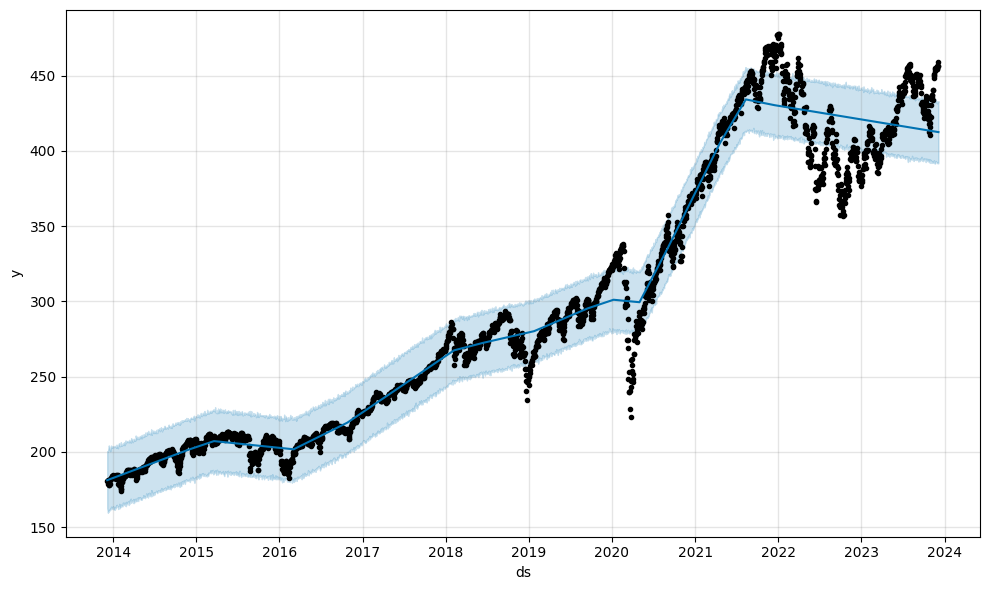

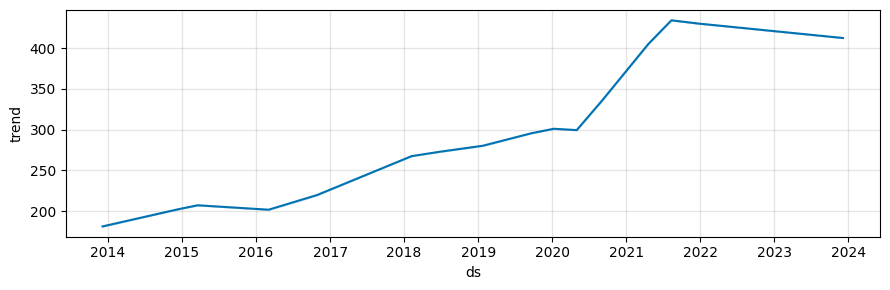

In [ ]:
# Plot the forecast
fig = model.plot(forecast)
fig.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
fig2.show()

In [ ]:
# r-squared value without regressor
(prophet_data['y'].corr(forecast['yhat']))**2

0.9682229277897767